In [1]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import *

In [3]:
def function(x1, x2):
    return 0.5*x1**2 + (5/2)*x2**2 - x1*x2 - 2*(x1 + x2)

In [8]:
def gradient(x1, x2):
    return np.array([-2 + x1 - x2, -2 - x1 + 5*x2])

def norm(mat1x2):
    n_line = mat1x2.shape[0]
    N = 0
    for i in range(n_line):
        N += mat1x2[i]**2
    return math.sqrt(N)

In [10]:
# random
x1, x2 = 2, 1
grad_fn = gradient(x1, x2)

lr = 0.1
ep = 1e-4

n_grad = norm(grad_fn)
i = 1
f_value = function(x1, x2)
diff_f = 0
L_diff = []
his_x1_x2 = [[x1, x2]]

while n_grad > ep:
    direction = -grad_fn
    x1, x2 = x1 + lr*direction[0], x2 + lr*direction[1] 
    his_x1_x2 = np.vstack((his_x1_x2, [x1, x2]))
    diff_f = function(x1, x2) - f_value
    L_diff.append(diff_f)
    f_value = function(x1, x2)
    grad_fn = gradient(x1, x2)
    n_grad = norm(grad_fn)
    i +=1    

his_x1 = his_x1_x2[:, 0]
his_x2 = his_x1_x2[:, 1]

**Visualization**

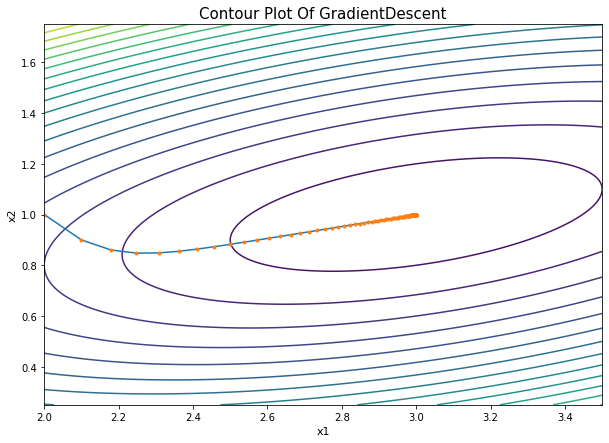

In [19]:
x1 = np.linspace(2, 3.5, 150)
x2 = np.linspace(0.25, 1.75, 150)
X1, X2 = np.meshgrid(x1, x2)
Z = function(X1, X2)
fig = plt.figure(figsize = (10,7))
contours = plt.contour(X1, X2, Z, 20)

plt.title("Contour Plot Of GradientDescent", fontsize=15)

plt.plot(his_x1, his_x2)
plt.plot(his_x1, his_x2, '.')

plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.show()